In [1]:
from functions import Datasets, import_data, description, obliczanie_wieku, przedzialy_ufnosci_srednia, sprawdz_rozklad, sprawdz_rozklad1, porownaj_srednie, bootstrap_gender
from functions import boxplot, line_plot, time_plot, bar_plot, plot_hist
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import pyplot as plt


In [2]:
print(Datasets())

Dostępne datasety: patient, region, weather


1. Pobranie danych 

In [3]:
patient = import_data(Datasets.patient)
patient.dropna(subset=['sex','birth_year','age','country','confirmed_date','state'], inplace=True)
region = import_data(Datasets.region)
region.dropna(how='all')
weather = import_data(Datasets.weather)
patient.drop(columns=['global_num','disease','infection_order','infected_by','contact_number'], inplace=True) 
region.drop(columns=['latitude','longitude'], inplace=True)
weather.drop(columns=['code','min_temp','max_temp','precipitation','max_wind_speed','most_wind_direction'], inplace=True)
patient_region = pd.merge(patient, region, how='inner', on=['province', 'city'])
patient_weather = pd.merge(patient, weather, how='inner', left_on=['confirmed_date', 'province'], right_on=['date', 'province'])

2. Dostępne kolumny

In [4]:
print(patient.columns)
print(region.columns)
print(weather.columns)
print(patient_region.columns)
print(patient_weather.columns)

Index(['patient_id', 'sex', 'birth_year', 'age', 'country', 'province', 'city',
       'infection_case', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')
Index(['code', 'province', 'city', 'elementary_school_count',
       'kindergarten_count', 'university_count', 'academy_ratio',
       'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count'],
      dtype='object')
Index(['province', 'date', 'avg_temp', 'avg_relative_humidity'], dtype='object')
Index(['patient_id', 'sex', 'birth_year', 'age', 'country', 'province', 'city',
       'infection_case', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'code',
       'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count'],
      dtype='object')
Index(['patient_id', 'sex', 'birth_year', 'age', 'country

3. Przedstawienie podstawowych charakterystyk dla wybranej bazy - wskaż jeden DataFrame z (patient, region, weather)  

In [17]:
interact(description, x=[('patient', 'patient'), ('region', 'region'), ('weather', 'weather')]);

interactive(children=(Dropdown(description='x', options=(('patient', 'patient'), ('region', 'region'), ('weath…

4. Wyrysowanie histogramu dla wybranej kolumny - wskaż jeden DataFrame z (patient, region, weather)  
oraz numer kolumny 

In [6]:
interact (plot_hist, x=[('pleć',1),('rok_urodzenia',2),('wiek',3),('kraj',4),('stan',12),('śr_temp',14), ('avg_rel_wilgotność',15)])

interactive(children=(Dropdown(description='x', options=(('pleć', 1), ('rok_urodzenia', 2), ('wiek', 3), ('kra…

<function functions.plot_hist(x)>

5. Wyrysowanie boxplota dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny grupujacej oraz kolumne z wartosciami

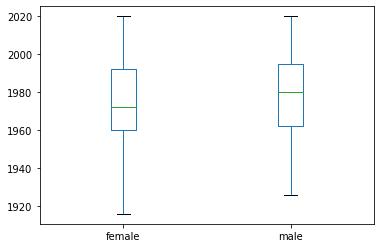

In [8]:
boxplot(patient, 'sex', 'birth_year')

6. Wyrysowanie wykresu liniowego dla wybranego przedzialu czasowego - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny z wartosciami oraz nazwe kolumny z datami. Opcjonalnie wybierz przedzial czasowy podajac argumenty start i end.

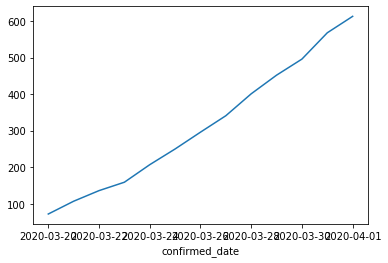

In [9]:
# Argumenty 'start', 'end' sa opcjonalne
time_plot(patient, 'patient_id', 'confirmed_date', start='2020-03-20', end='2020-04-01')

7. Wyrysowanie wykresu liniowego dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny dla osi x, nazwe kolumny grupujacej oraz koulmy z wartosciami. Opcjonalnie podaj wartosc agregatu (domyslnie ustawiony jako count)

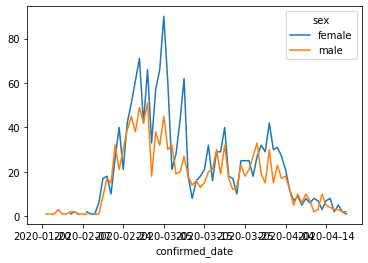

In [18]:
line_plot(patient, 'confirmed_date', 'sex', 'patient_id', 'count');

8. Wyrysowanie barplota dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny grupujacej oraz kolumne z wartosciami. Opcjonalnie podaj wartosc agregatu (domyslnie ustawiony jako count)

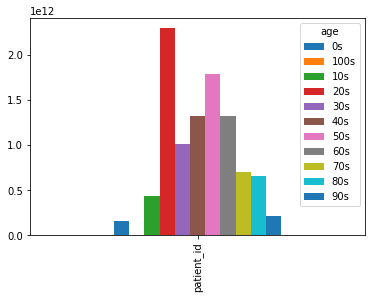

In [11]:
bar_plot(patient, 'age', 'patient_id', 'sum');

9. Obliczanie przedzialow ufnosci dla sredniej - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny z wartosciami oraz poziom ufnosci

In [12]:
przedzialy_ufnosci_srednia(obliczanie_wieku(patient, 'birth_year'), 0.95)

C:\Users\ADM\Desktop\szkolenie\repo\jdsz5-outdated\python\functions.py:327: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  f = lambda x: pd.datetime.now().year - x


'Srednia: 45.066528066528065. Przedzialy ufnosci: 44.3267322002686, 45.80632393278753'

10. Sprawdzanie normalności rozkładu - wskaż kolumnę, dla której chciałbys przprowadzić test: patient_id lub birth_year

In [13]:
sprawdz_rozklad()

interactive(children=(Dropdown(description='column', options=('patient_id', 'birth_year'), value='patient_id')…

11. Przeprowadzenie porównania dwóch średnich - wskaż nazwę wybranej kolumny, dwie kategorie dla, których średnie mają być porównywane  oraz kolumne z wartosciami oraz kolumnę wskazującą dane do porównania: patient_id lub birth_year  

In [15]:
porownaj_srednie()

interactive(children=(Dropdown(description='column1', options=('patient_id', 'sex', 'birth_year', 'age', 'coun…

12. Przeprowadzenie testu Monte-Carlo w celu porównania średniej zachorowalność wśród osób różnych płci w konkretnych latach

In [16]:
bootstrap_gender()

Wynik testu istotny w 7.3% symulacji
